<a href="https://colab.research.google.com/github/Abbast/Thinkfulta18/blob/main/Capstone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Research Proposal ##

For this capstone project, we have elected to perform analysis upon the dataset from the link below:

https://datacatalog.worldbank.org/dataset/worldwide-bureaucracy-indicators

The above dataset comes from the Worldwide Bureaucracy Indicators database, via the webpage of the World Bank. The dataset is comprised of census-based data, mainly floating point numerical values, on public and private sector employment in 130+ nations between the years 2000 and 2018. 

This dataset is interesting due to its scope, content, and potential in responding to socio-economic questions. The shape of this dataset in a pandas frame is (12144, 24) i.e., 12144 rows for country names and 24 columns. Analysis of this dataset allows for comparisons between nations or continents over a variety of axes, or across spans of time. 

Specifically, this capstone will seek to answer the following question:

1. On average, is there a difference in the female share of paid private sector employees in European Union member nations between 2012 and 2017, given the samples that have been collected?

To answer this question, we will state our null and alternative hypotheses as follows:

$H_0 : $ there is no difference in the female share of paid private sector employees in EU member nations between 2012 and 2017

$H_a : $ there is a difference in the female share of paid private sector employees in EU member nations between 2012 and 2017

To test these hypotheses, we will begin by conducting normality tests on the data from the SciPy stats library, in particular the normal test and Shapiro-Wilks tests, to determine if the data is normally distributed. Depending on the results of the normality tests, we will either proceed with an parametric tests such as the one-way ANOVA test or non-parametric tests to further test our hypothesis. 

Time-permitting, we may seek to answer a secondary question:

2. On average, is there a difference in the female to male wage ratio in the private sector of European Union member nations, given the samples collected, between 2012 and 2017?

Our null and alternative hypotheses for this question are the following:

$H_0 : $ there is no difference in the female to male wage ratio in the private sector of EU member nations, given the collected samples, between  2000 and 2018

$H_a : $ there is a difference in the female to male wage ratio in the private sector of EU member nations, given the collected samples, between  2000 and 2018

The testing for this secondary question will generally proceed in the same manner as that for the primary question above.


These are questions rooted in economics and social justice pertinent to the advancement of women in the European Union, and they would be interesting to those in government, social justice, or the business sector seeking to address potential pay discrepancies or hiring/employment biases based upon gender in Europe (specifically the European Union). Additionally, the general public would benefit greatly from directly seeing the responses to the above questions as they are relevant regardless of location, especially the female to male wage ratio.


## Question 1 ##

In [1]:
# Import modules and libraries 

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Import our data into a dataframe

wwbi = pd.read_csv("https://raw.githubusercontent.com/Abbast/Thinkfulta18/main/WWBIData.csv")

In [3]:
# Determine the shape of the table 

wwbi.shape

(38784, 24)

12144 rows and 24 columns. Not too bad.

In [4]:
# Display the first 10 rows

wwbi.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 23
0,Afghanistan,AFG,Cross-country public sector pay comparison rat...,BI.PWK.CMPA.GE.SM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Cross-country public sector pay comparison rat...,BI.PWK.CMPA.GE.MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Cross-country public sector pay comparison rat...,BI.PWK.CMPA.HD.SM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,Cross-country public sector pay comparison rat...,BI.PWK.CMPA.HD.MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,Cross-country public sector pay comparison rat...,BI.PWK.CMPA.HN.SM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,AFG,Cross-country public sector pay comparison rat...,BI.PWK.CMPA.HN.MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AFG,Cross-country public sector pay comparison rat...,BI.PWK.CMPA.JU.SM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,AFG,Cross-country public sector pay comparison rat...,BI.PWK.CMPA.JU.MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,AFG,Cross-country public sector pay comparison rat...,BI.PWK.CMPA.PO.SM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,AFG,Cross-country public sector pay comparison rat...,BI.PWK.CMPA.PO.MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It seems that there are a lot of null values or missing entries within the dataframe.  

In [5]:
# Check for null values 

wwbi.isna()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 23
0,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38779,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
38780,False,False,False,False,True,False,True,True,True,True,True,False,True,True,True,False,True,True,True,True,True,True,True,True
38781,False,False,False,False,True,False,True,True,True,True,True,False,True,True,True,False,True,True,True,True,True,True,True,True
38782,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [6]:
# Females as a share of private paid employees

wwbi_female_priv_paid = wwbi[wwbi['Indicator Name'] == 'Females, as a share of private paid employees']

wwbi_female_priv_paid.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 23
25,Afghanistan,AFG,"Females, as a share of private paid employees",BI.PWK.PRVS.FE.ZS,NaN,NaN,NaN,0.098575,NaN,NaN,NaN,0.045495,NaN,NaN,NaN,0.054639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,Albania,ALB,"Females, as a share of private paid employees",BI.PWK.PRVS.FE.ZS,NaN,NaN,0.245135,NaN,NaN,0.224243,NaN,NaN,0.305101,NaN,NaN,NaN,0.30132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409,Algeria,DZA,"Females, as a share of private paid employees",BI.PWK.PRVS.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,Angola,AGO,"Females, as a share of private paid employees",BI.PWK.PRVS.FE.ZS,0.255768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.320480,NaN,NaN,NaN,NaN,NaN,0.309086,NaN,NaN,NaN,NaN,NaN
793,Anguilla,AIA,"Females, as a share of private paid employees",BI.PWK.PRVS.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Check countries 

wwbi_female_priv_paid[wwbi_female_priv_paid['Country Name'] == 'Sweden']

wwbi.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', 'Unnamed: 23'],
      dtype='object')

In [8]:
# List of EU countries with data within our table

eu = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 
      'Estonia', 'Finland', 'France', 'Greece', 'Hungary', 
      'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 
      'Poland', 'Portugal', 'Romania', 'Slovak Republic', 'Spain']

In [9]:
# Iterate through the above eu list to append to our the following empty DataFrame

wwbi_female_priv_paid_EU = pd.DataFrame(columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
      '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
      '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
      '2018', 'Unnamed: 23'])

for i in range(len(eu)):

    eu_value = wwbi_female_priv_paid[wwbi_female_priv_paid['Country Name'] == eu[i]]
    
    wwbi_female_priv_paid_EU = wwbi_female_priv_paid_EU.append(eu_value, ignore_index = True)


In [10]:
wwbi_EU_fem = wwbi_female_priv_paid_EU.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 23'])

wwbi_EU_fem

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Austria,NaN,NaN,NaN,NaN,0.451399,0.460639,0.463537,0.454800,0.386014,0.396838,0.378366,0.390533,0.379744,0.379004,0.373198,0.383351,0.385543,0.388131,0.396237
1,Belgium,NaN,NaN,NaN,NaN,0.394609,0.408523,0.402484,0.411294,0.353284,0.352764,0.368585,0.368585,0.368757,0.386659,0.382949,0.365466,0.362359,0.369229,0.363287
2,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.405310,0.437140,0.437419,0.442803,0.449731,0.437609,0.444152,0.446151,0.431181,0.431878,0.438635,0.429120
3,Croatia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.425202,0.416951,0.408845,0.412561,0.407096,0.408065,0.407357,0.413466,0.408734
4,Cyprus,NaN,NaN,NaN,NaN,NaN,0.450963,0.441996,0.448156,0.445168,0.446720,0.464551,0.461991,0.470412,0.467757,0.463796,0.470127,0.459258,0.447882,0.450131
5,Czech Republic,NaN,NaN,NaN,NaN,NaN,0.422902,0.401150,0.416879,0.394147,0.393438,0.394917,0.393596,0.399399,0.400212,0.398822,0.395735,0.396434,0.397294,0.403306
6,Estonia,NaN,NaN,NaN,NaN,0.456897,0.441743,0.446947,0.452051,0.444583,0.460045,0.465695,0.454675,0.445528,0.444035,0.435701,0.433850,0.434973,0.437222,0.437181
7,Finland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.391210,NaN,NaN,NaN,0.387556,0.377038,0.401616,0.392789,0.381776,0.386811,0.395118
8,France,NaN,NaN,NaN,NaN,0.432670,0.438436,0.446813,0.444790,0.390090,0.401853,0.374995,0.380182,0.410747,0.399603,0.415536,0.414476,0.414013,0.388489,0.388577
9,Greece,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.411760,0.386967,0.385664,0.409254,0.412937,0.404921,0.423209,0.400388,0.409820,0.413198,0.403108,0.405794


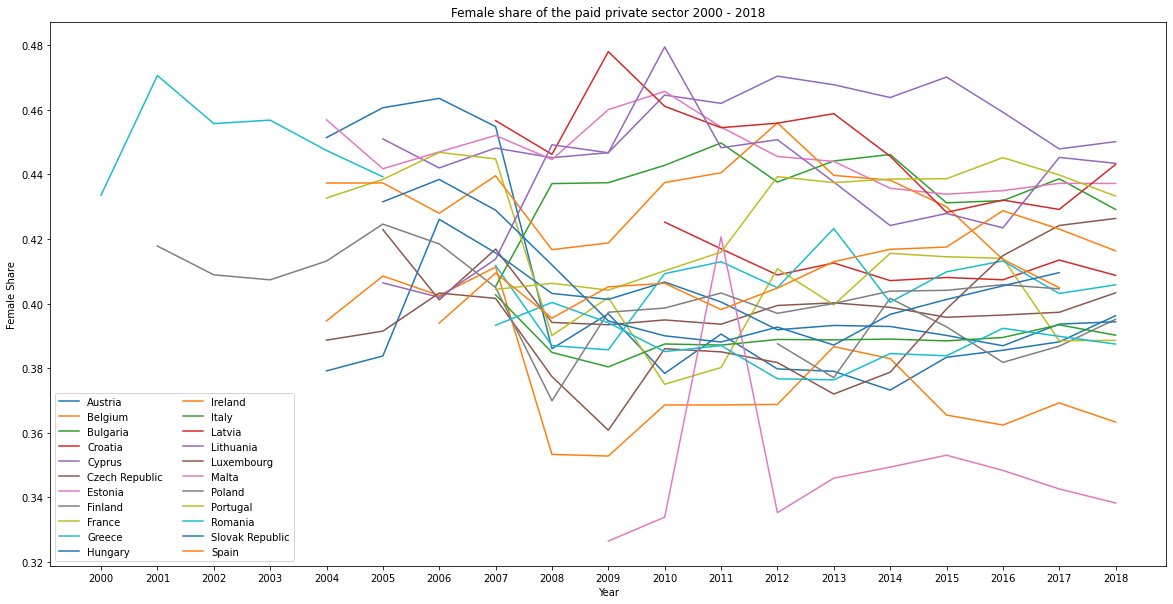

In [12]:
# Generate a plot for the evolution of the female share of the private
# paid sector over time, this is unfortunately a lot of the same line of code

# Set a figure size such that the plot is legible

plt.figure(figsize = (20,10))

for i in range(22):

    plt.plot(wwbi_EU_fem.columns[1:], list(wwbi_EU_fem.iloc[i].values[1:]), label = wwbi_EU_fem['Country Name'][i])

# Add labels and a legend to the plot 

plt.legend(loc = 'lower left', ncol = 2)
plt.title('Female share of the paid private sector 2000 - 2018')
plt.xlabel('Year')
plt.ylabel('Female Share')

plt.savefig('EU_female_share.png')

Upon inspection of the dataframe and the above plot, we would not be able to do an analysis from 2000 to 2018, since a majority of the nations within the above dataframe are missing data for the years 2000 to 2004. An analysis would be possible for any year following 2007.

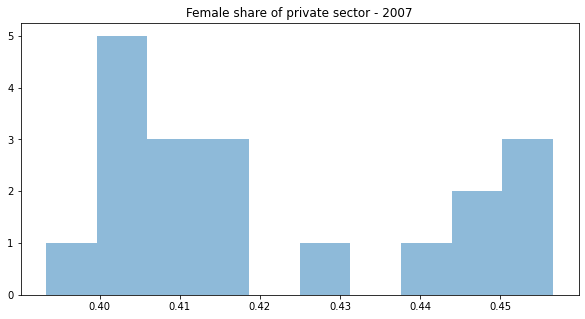

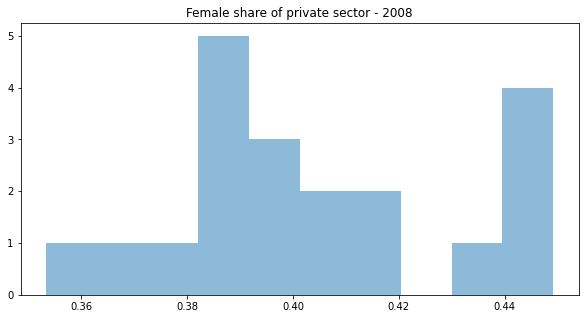

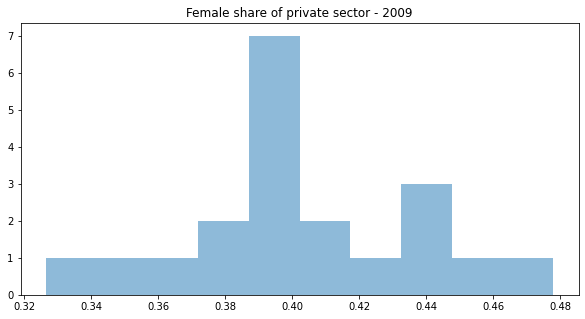

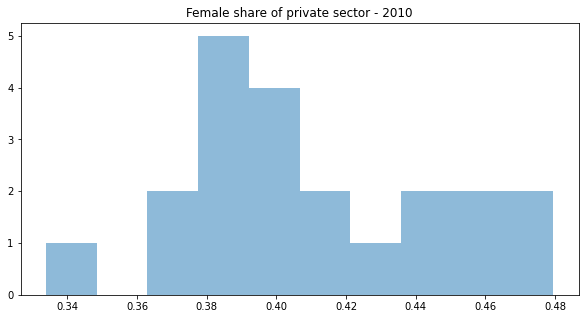

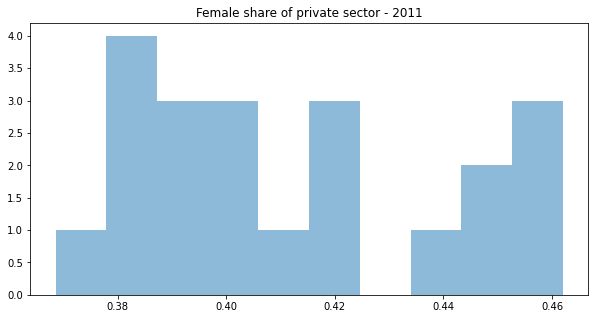

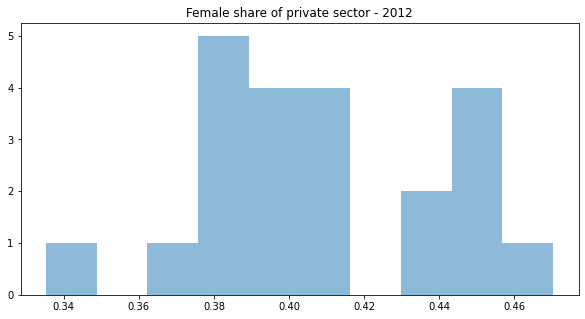

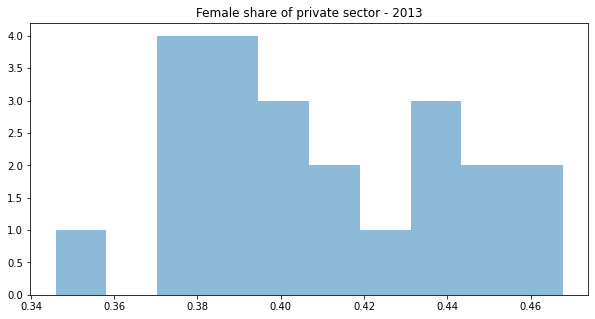

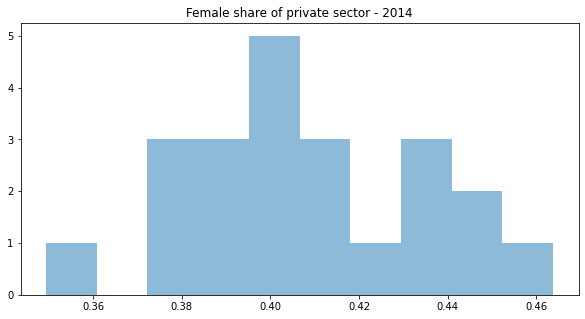

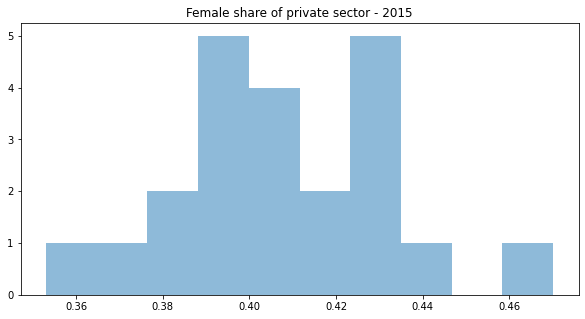

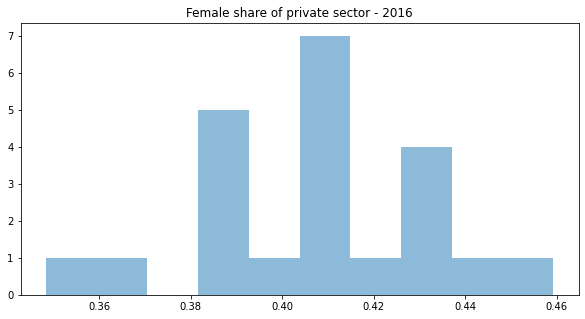

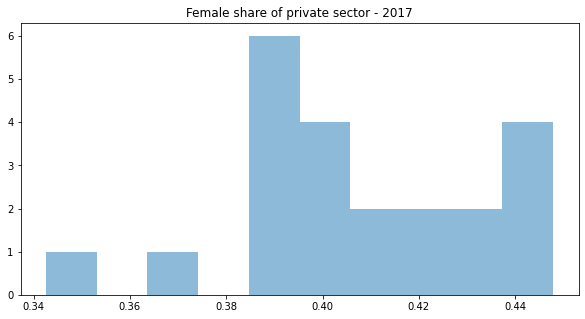

In [13]:
 # Conduct a preliminary normality check via histogram plots

for i in range(11):

    plt.figure(figsize=(10,5))
    
    plt.hist(wwbi_EU_fem[wwbi_EU_fem.columns[i + 8]], alpha = 0.5, label = wwbi_EU_fem.columns[i + 8])
    plt.title("Female share of private sector - {year}".format(year = wwbi_EU_fem.columns[i + 8]))


Some of these appear to be vaguely normally distributed. To be more certain, we will conduct the normal and Shapiro-Wilks tests for each year. 

In [14]:
# Conduct normality tests for the years 2007 - 2017


for i in range(11):

    print("Normal Test: ", stats.normaltest(wwbi_EU_fem[wwbi_EU_fem.columns[i + 8]]))
    print("Shapiro-Wilks Test: ", stats.shapiro(wwbi_EU_fem[wwbi_EU_fem.columns[i + 8]]))

Normal Test:  NormaltestResult(statistic=nan, pvalue=nan)
Shapiro-Wilks Test:  (nan, 1.0)
Normal Test:  NormaltestResult(statistic=nan, pvalue=nan)
Shapiro-Wilks Test:  (nan, 1.0)
Normal Test:  NormaltestResult(statistic=nan, pvalue=nan)
Shapiro-Wilks Test:  (nan, 1.0)
Normal Test:  NormaltestResult(statistic=nan, pvalue=nan)
Shapiro-Wilks Test:  (nan, 1.0)
Normal Test:  NormaltestResult(statistic=nan, pvalue=nan)
Shapiro-Wilks Test:  (nan, 1.0)
Normal Test:  NormaltestResult(statistic=0.12922211205148254, pvalue=0.93743200100852)
Shapiro-Wilks Test:  (0.951999306678772, 0.3458315432071686)
Normal Test:  NormaltestResult(statistic=0.7896112445266783, pvalue=0.6738110003776819)
Shapiro-Wilks Test:  (0.9627854824066162, 0.5475531220436096)
Normal Test:  NormaltestResult(statistic=0.06673916370393403, pvalue=0.9671810409665964)
Shapiro-Wilks Test:  (0.9787768125534058, 0.8958495855331421)
Normal Test:  NormaltestResult(statistic=0.6403527158528883, pvalue=0.726020986226946)
Shapiro-Wilks 

Hm, it seems that when conducting tests for the years 2007 to 2011, we are unable to obtain a test statistic. This most likely stems from the small sample size for each of those years in the dataset. Thus, for further analysis, we will only consider the years 2012 to 2017.

In [15]:
# Print Shapiro-Wilks and Normal test result statements for the years 2012 - 2017

for i in range(6):

    print("Normal Test {}: ".format(wwbi_EU_fem.columns[i + 13]), stats.normaltest(wwbi_EU_fem[wwbi_EU_fem.columns[i + 13]]))
    print("Shapiro-Wilks Test {}: ".format(wwbi_EU_fem.columns[i + 13]), stats.shapiro(wwbi_EU_fem[wwbi_EU_fem.columns[i + 13]]))

Normal Test 2012:  NormaltestResult(statistic=0.12922211205148254, pvalue=0.93743200100852)
Shapiro-Wilks Test 2012:  (0.951999306678772, 0.3458315432071686)
Normal Test 2013:  NormaltestResult(statistic=0.7896112445266783, pvalue=0.6738110003776819)
Shapiro-Wilks Test 2013:  (0.9627854824066162, 0.5475531220436096)
Normal Test 2014:  NormaltestResult(statistic=0.06673916370393403, pvalue=0.9671810409665964)
Shapiro-Wilks Test 2014:  (0.9787768125534058, 0.8958495855331421)
Normal Test 2015:  NormaltestResult(statistic=0.6403527158528883, pvalue=0.726020986226946)
Shapiro-Wilks Test 2015:  (0.9817262291908264, 0.9408144354820251)
Normal Test 2016:  NormaltestResult(statistic=0.596246369202776, pvalue=0.7422099052849023)
Shapiro-Wilks Test 2016:  (0.9845492243766785, 0.9714086651802063)
Normal Test 2017:  NormaltestResult(statistic=1.0184622610386045, pvalue=0.6009574590761741)
Shapiro-Wilks Test 2017:  (0.9549680352210999, 0.39467817544937134)


In [16]:
# Check the distributions for kurtosis and skewnes

for i in range(6):

    print("{}: ".format(wwbi_EU_fem.columns[i + 13]),stats.describe(wwbi_EU_fem[wwbi_EU_fem.columns[i + 13]]))

2012:  DescribeResult(nobs=22, minmax=(0.33523952960968, 0.470411896705627), mean=0.4083719565109773, variance=0.001160800289503693, skewness=0.0995877647886473, kurtosis=-0.5738598293830237)
2013:  DescribeResult(nobs=22, minmax=(0.34591200947761497, 0.46775650978088396), mean=0.4083693420345133, variance=0.0010194092055866427, skewness=0.14880407510919286, kurtosis=-0.8400536666042631)
2014:  DescribeResult(nobs=22, minmax=(0.349335759878159, 0.46379572153091403), mean=0.40833907371217554, variance=0.0007903972141095478, skewness=0.08123885500220032, kurtosis=-0.518489542823561)
2015:  DescribeResult(nobs=22, minmax=(0.353026002645493, 0.47012683749198897), mean=0.40755201605233277, variance=0.000699328389997281, skewness=0.14196345968938812, kurtosis=0.12282864423560547)
2016:  DescribeResult(nobs=22, minmax=(0.34831914305687, 0.45925754308700606), mean=0.4078648496757855, variance=0.0007004365703169341, skewness=-0.2774699395062059, kurtosis=-0.11866253661502801)
2017:  DescribeRes


Since every p-value for the years 2012 to 2017 is greater than 0.05, we can interpret the test results as stating that it is very likely these were sampled from a normal distribution, one with skewness and kurtosis in the range (-1, 1). We can thus proceed with a parametric test method. In particular, as we have multiple groups that are normally distributed, we will conduct an ANOVA test

In [17]:
# Conduct an ANOVA parametric test

print(stats.f_oneway(wwbi_EU_fem['2012'], wwbi_EU_fem['2013'], wwbi_EU_fem['2014'], wwbi_EU_fem['2015'], wwbi_EU_fem['2016'], wwbi_EU_fem['2017']))

F_onewayResult(statistic=0.0034902038429416235, pvalue=0.999997810332072)


Since the p-value is greater than 0.05, we are unable to reject the null hypothesis.rue We can interpret this p-value as the following: Even if our null hypothesis was true, there is a 99.99% chance of observing a difference as large as what was observed.

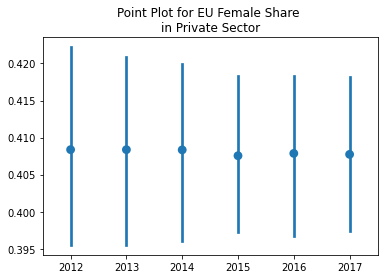

In [20]:
# Plot the difference in means via point plot 

g = sns.pointplot(data= [wwbi_EU_fem['2012'], wwbi_EU_fem['2013'], wwbi_EU_fem['2014'], 
                         wwbi_EU_fem['2015'], wwbi_EU_fem['2016'], wwbi_EU_fem['2017']], join = False)

g.set(xticklabels = ['2012', '2013', '2014', '2015', '2016', '2017'])
plt.title("Point Plot for EU Female Share \nin Private Sector")

plt.savefig('Point_plot_EU_fem.png')

## Question 2 ##

In [21]:
wwbi_wage_ratio = wwbi[wwbi['Indicator Name'] == 'Female to male wage ratio in the private sector (using median)']


wwbi_wage_ratio

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 23
22,Afghanistan,AFG,Female to male wage ratio in the private secto...,BI.WAG.PRVS.FM.MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.533333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,Albania,ALB,Female to male wage ratio in the private secto...,BI.WAG.PRVS.FM.MD,NaN,NaN,0.632413,NaN,NaN,0.652174,NaN,NaN,0.828539,NaN,NaN,NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,Algeria,DZA,Female to male wage ratio in the private secto...,BI.WAG.PRVS.FM.MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,Angola,AGO,Female to male wage ratio in the private secto...,BI.WAG.PRVS.FM.MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
790,Anguilla,AIA,Female to male wage ratio in the private secto...,BI.WAG.PRVS.FM.MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37846,Vietnam,VNM,Female to male wage ratio in the private secto...,BI.WAG.PRVS.FM.MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38038,West Bank and Gaza,PSE,Female to male wage ratio in the private secto...,BI.WAG.PRVS.FM.MD,0.5,0.650000,0.600000,0.666667,NaN,NaN,NaN,0.549451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38230,Yemen,YEM,Female to male wage ratio in the private secto...,BI.WAG.PRVS.FM.MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38422,Zambia,ZMB,Female to male wage ratio in the private secto...,BI.WAG.PRVS.FM.MD,NaN,NaN,0.681818,NaN,NaN,NaN,NaN,NaN,0.700000,NaN,0.690909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# We will iterate through a list of EU member nations to append Series to an empty
# DataFrame

# Create a list of European Union nations

EU_Mitglieder = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 
      'Denmark', 'Estonia', 'Finland', 'France', 'Greece', 'Hungary', 
      'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 
      'Poland', 'Portugal', 'Romania', 'Slovak Republic', 'Spain']

# Create an empty DataFrame with the same columns as our original DataFrame

wwbi_empty_frame = pd.DataFrame(columns = ['Country Name','Indicator Name', '2000', '2001', 
      '2002', '2003', '2004', '2005', '2006', '2007', '2008','2009', '2010', 
      '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])


# Iterate through the list and append Series to our empty DataFrame

for country in EU_Mitglieder:

      EU_val = wwbi[wwbi['Country Name'] == country]

      wwbi_empty_frame = wwbi_empty_frame.append(EU_val, ignore_index = True)

In [23]:
# Filter the DataFrame based upon the chosen indicator

wwbi_eu_wage_ratio = wwbi_empty_frame[wwbi_empty_frame['Indicator Name'] == 'Female to male wage ratio in the private sector (using median)']

# Drop the columns 'Country Code', 'Indicator Code', and 'Unnamed: 23'
# Display the resulting DataFrame

wwbi_eu_wage_ratio = wwbi_eu_wage_ratio.drop(columns= ['Country Code', 'Indicator Code', 'Indicator Name', 'Unnamed: 23'])
wwbi_eu_wage_ratio

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
22,Austria,NaN,NaN,NaN,NaN,0.602434,0.645836,0.655556,0.601399,0.586732,0.567455,0.594674,0.625985,0.613532,0.602038,0.582329,0.572742,0.588884,0.585104,0.576298
214,Belgium,NaN,NaN,NaN,NaN,0.723653,0.725270,0.741257,0.707451,0.745067,0.758135,0.741487,0.757707,0.767130,0.713646,0.765898,0.788942,0.765894,0.774924,0.765910
406,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.850419,0.780017,0.757123,0.795273,0.818182,0.788348,0.822298,0.819067,0.820952,0.857646,0.880447,0.878810
598,Croatia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.797630,0.837885,0.830127,0.866168,0.808964,0.851877,0.786019,0.797422,0.750372
790,Cyprus,NaN,NaN,NaN,NaN,NaN,0.598367,0.599827,0.609046,0.568261,0.593548,0.628306,0.613440,0.626497,0.648650,0.687166,0.706775,0.724550,0.748170,0.747355
982,Czech Republic,NaN,NaN,NaN,NaN,NaN,0.724749,0.703676,0.686982,0.684746,0.712761,0.705882,0.692231,0.724002,0.725166,0.712387,0.711322,0.722303,0.714937,0.721659
1174,Denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.866370,0.822611,0.837637
1366,Estonia,NaN,NaN,NaN,NaN,0.622726,0.610153,0.655591,0.641580,0.662870,0.637013,0.632906,0.648199,0.609152,0.611801,0.633005,0.712882,0.674987,0.741338,0.745593
1558,Finland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.723782,NaN,NaN,NaN,0.772501,0.778397,0.753174,0.764811,0.767966,0.773641,0.786019
1750,France,NaN,NaN,NaN,NaN,0.724679,0.747288,0.743950,0.742092,0.765914,0.755142,0.809411,0.822543,0.804775,0.800292,0.813146,0.810841,0.809887,0.814231,0.829750


For any analysis, we will have to consider the years 2008 to 2018, as there are more than 20 countries with data in each year. 

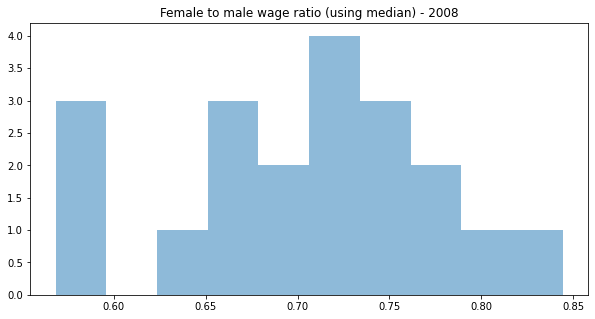

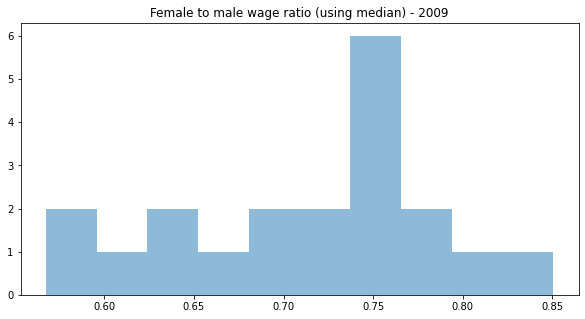

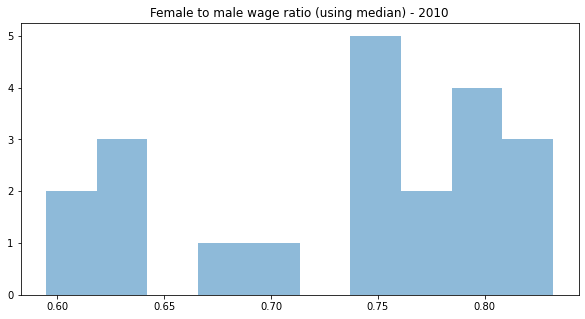

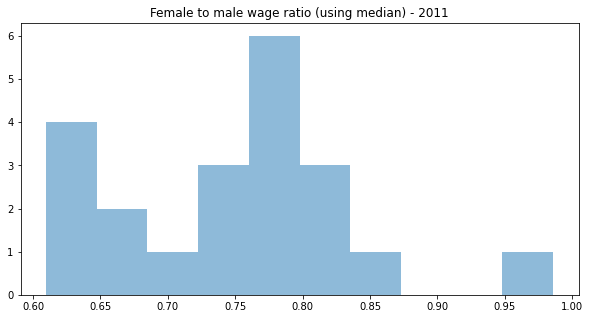

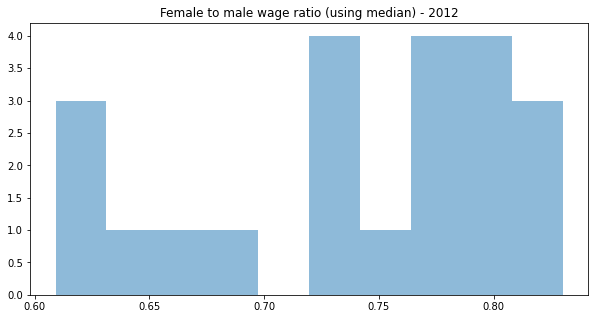

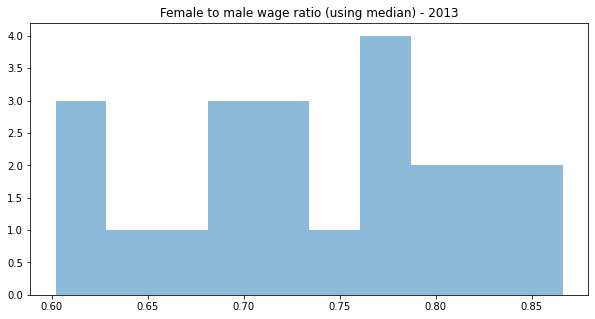

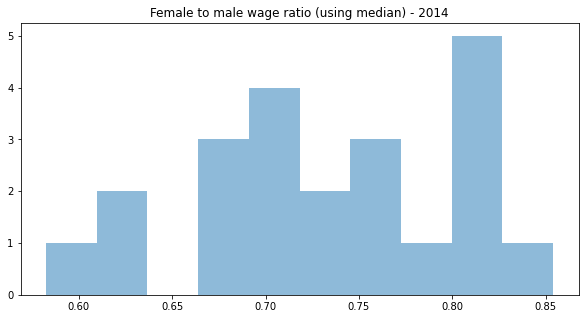

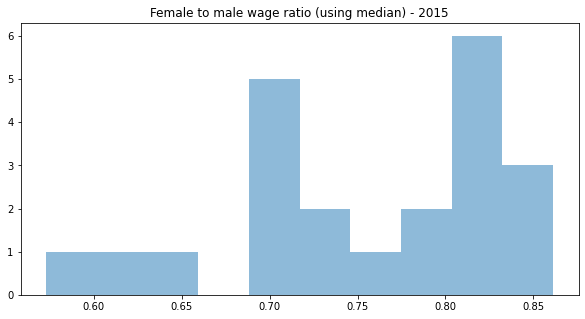

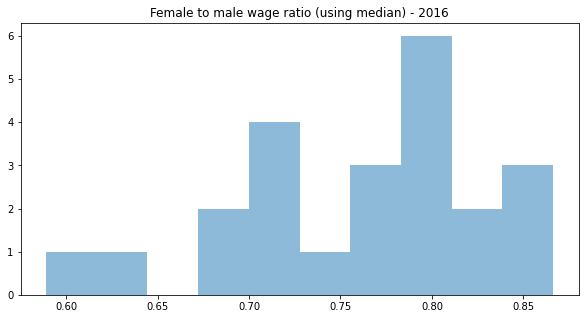

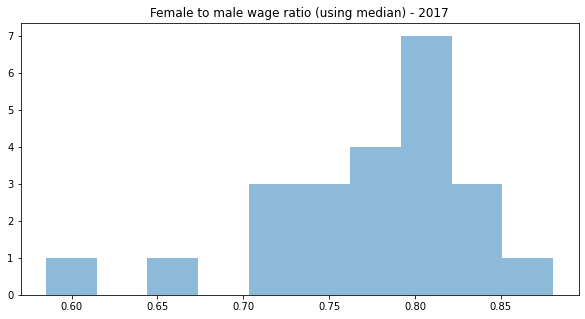

In [24]:
# Plot histograms for a preliminary normality check

# wwbi_eu_wage_ratio.columns[19]

for i in range(10):

    plt.figure(figsize= (10, 5))

    plt.hist(wwbi_eu_wage_ratio[wwbi_eu_wage_ratio.columns[i + 9]], alpha = 0.5)
    plt.title("Female to male wage ratio (using median) - {}".format(wwbi_eu_wage_ratio.columns[i + 9]))

In [25]:
# We will need to check for skewness and kurtosis


for i in range(10):

    print(stats.describe(wwbi_eu_wage_ratio[wwbi_eu_wage_ratio.columns[i + 9]]))


DescribeResult(nobs=23, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)
DescribeResult(nobs=23, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)
DescribeResult(nobs=23, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)
DescribeResult(nobs=23, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)
DescribeResult(nobs=23, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)
DescribeResult(nobs=23, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)
DescribeResult(nobs=23, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)
DescribeResult(nobs=23, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)
DescribeResult(nobs=23, minmax=(0.588883936405182, 0.866369783878326), mean=0.7585520200107408, variance=0.005066009134171193, skewness=-0.6842602474337864, kurtosis=-0.038541068692467206)
DescribeResult(nobs=23, minmax=(0.585104405879974, 

In [26]:
# Conduct normal and Shapiro-Wilks tests

for i in range(10):

    print("{}: ".format(wwbi_eu_wage_ratio.columns[i + 9]), stats.normaltest(wwbi_eu_wage_ratio[wwbi_eu_wage_ratio.columns[i + 9]]))
    print("{}: ".format(wwbi_eu_wage_ratio.columns[i + 9]), stats.shapiro(wwbi_eu_wage_ratio[wwbi_eu_wage_ratio.columns[i + 9]]))

2008:  NormaltestResult(statistic=nan, pvalue=nan)
2008:  (nan, 1.0)
2009:  NormaltestResult(statistic=nan, pvalue=nan)
2009:  (nan, 1.0)
2010:  NormaltestResult(statistic=nan, pvalue=nan)
2010:  (nan, 1.0)
2011:  NormaltestResult(statistic=nan, pvalue=nan)
2011:  (nan, 1.0)
2012:  NormaltestResult(statistic=nan, pvalue=nan)
2012:  (nan, 1.0)
2013:  NormaltestResult(statistic=nan, pvalue=nan)
2013:  (nan, 1.0)
2014:  NormaltestResult(statistic=nan, pvalue=nan)
2014:  (nan, 1.0)
2015:  NormaltestResult(statistic=nan, pvalue=nan)
2015:  (nan, 1.0)
2016:  NormaltestResult(statistic=2.6585814675003983, pvalue=0.2646649126346162)
2016:  (0.9499754309654236, 0.2922884225845337)
2017:  NormaltestResult(statistic=8.029147301946649, pvalue=0.018050648786959785)
2017:  (0.9256759881973267, 0.0882200226187706)


It is evident that the years 2008 - 2015 do not have enough entries for the normality checks to return a value. There are two options going forward:

1. We fill in the missing values for each nation with a replacement value

2. We proceed with our analysis for only the years 2016 and 2017

The only ethical option would be to proceed with option 2, i.e. conduct our analysis for the years 2016 and 2017

In [27]:
# Repeat our normality tests, this time for only 2016 and 2017

for i in range(2):

    print("{}:".format(wwbi_eu_wage_ratio.columns[i + 17]), stats.normaltest(wwbi_EU_fem[wwbi_eu_wage_ratio.columns[i + 17]]))
    print("{}:".format(wwbi_eu_wage_ratio.columns[i + 17]), stats.shapiro(wwbi_EU_fem[wwbi_eu_wage_ratio.columns[i + 17]]))

2016: NormaltestResult(statistic=0.596246369202776, pvalue=0.7422099052849023)
2016: (0.9845492243766785, 0.9714086651802063)
2017: NormaltestResult(statistic=1.0184622610386045, pvalue=0.6009574590761741)
2017: (0.9549680352210999, 0.39467817544937134)


Okay, the p-values for each year and test are greater than 0.05, insinuating that these samples originate from a normal distribution. We may then continue our analysis with an independent samples t-test.

In [28]:
# Perform an independent samples t-test

print(stats.ttest_ind(wwbi_eu_wage_ratio['2016'], wwbi_eu_wage_ratio['2017']))

Ttest_indResult(statistic=-0.6765474736045411, pvalue=0.5022343578287256)


As the p-value is greater than 0.05, we are unable to reject $H_0$, implying that there is not a statistically significant difference between the female to male wage ratio in 2016 and 2017. We will now plot a point plot and obtain the confidence interval.

In [29]:
# Get the 95 confidence interval

# Import the math module

import math

# First we define a function to compute the 95% confidence interval
def get_95_ci(array_1, array_2):

    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_mean_1 = array_1.mean()
    sample_mean_2 = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()

    mean_diff = sample_mean_2 - sample_mean_1
    std_err_diff = math.sqrt((sample_1_var/sample_1_n) + (sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_diff

    ci_lower = mean_diff - margin_of_error
    ci_upper = mean_diff + margin_of_error

    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".") 

get_95_ci(wwbi_eu_wage_ratio['2016'], wwbi_eu_wage_ratio['2017'])


'The difference in means at the 95% confidence interval (two-tail) is between -0.025971831313574528 and 0.053352940468317206.'

Text(0.5, 1.0, 'Point plot 2016 vs. 2017')

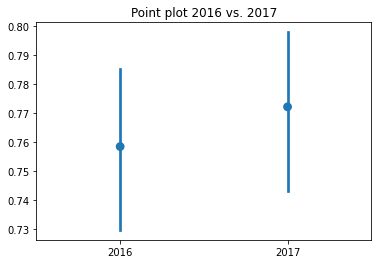

In [30]:
# Plot the difference in means with a pointplot

h = sns.pointplot(data = [wwbi_eu_wage_ratio['2016'], wwbi_eu_wage_ratio['2017']], join = False)

h.set(xticklabels = ['2016', '2017'])
plt.title("Point plot 2016 vs. 2017")